In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [36]:
def makeSeqLenPlots(familyId=None):
    if familyId != None:
        famSeqsTrain = df_train.loc[df_train.family_id == familyId, 'seq_expr'].reset_index(drop=True)
        #famSeqsDev = df_dev.loc[dev.family_id == familyId, 'sequence'].reset_index(drop=True)
        famSeqsTest = df_test.loc[df_test.family_id == familyId, 'seq_expr'].reset_index(drop=True)
    else:
        famSeqsTrain = df_train['seq_expr']
        #famSeqsDev = dev['sequence']
        famSeqsTest = df_test['seq_expr']
    # Length of sequence in train data for specific family (optional).
    trainCharCount = famSeqsTrain.apply(len)
    #devCharCount = famSeqsDev.apply(len)
    testCharCount = famSeqsTest.apply(len)

    def plot_seq_count(count, data_name):
        sns.distplot(count.values)
        plt.title(f'Sequence char count: {data_name}')
        plt.grid(True)

    plt.subplot(1, 3, 1)
    plot_seq_count(trainCharCount, 'Train')

    plt.subplot(1, 3, 2)
    #plot_seq_count(devCharCount, 'Dev')

    plt.subplot(1, 3, 3)
    plot_seq_count(testCharCount, 'Test')

    plt.subplots_adjust(right=3.0)
    plt.show()


/anaconda/envs/molcai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/molcai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


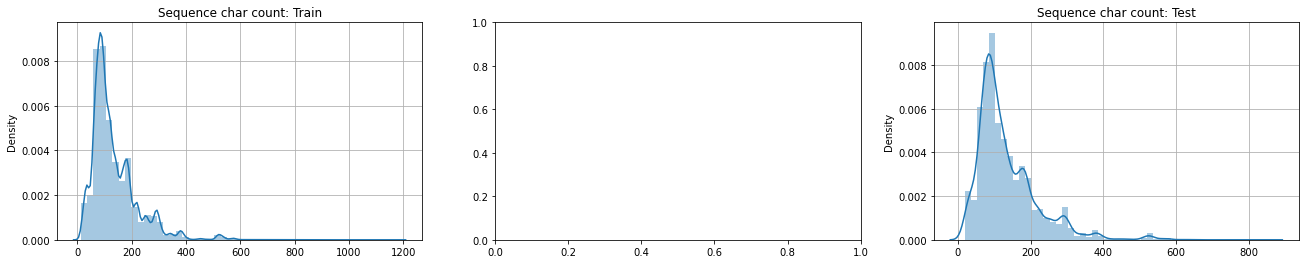

In [37]:
makeSeqLenPlots()

In [38]:
def pad_truncate_sequence(seq):
    max_len = 250
    if len(seq) < max_len:
        seq = seq.ljust(max_len, 'A')
    elif len(seq) > max_len:
        seq = seq[:max_len]
    return seq

In [39]:
df_train['seq_expr'] = df_train['seq_expr'].apply(pad_truncate_sequence)
df_test['seq_expr'] = df_test['seq_expr'].apply(pad_truncate_sequence)

/anaconda/envs/molcai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/molcai/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/anaconda/envs/molcai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/molcai/lib/python3.8/site-packa

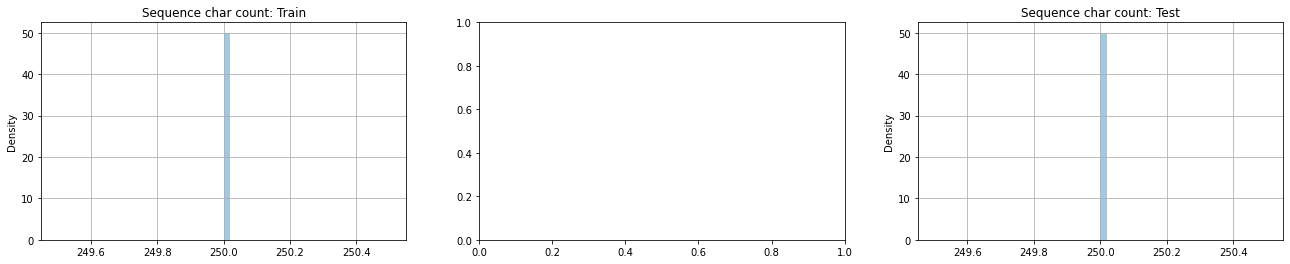

In [40]:
makeSeqLenPlots()

In [41]:
df_train.to_csv('data/train_padded.csv', index=False)
df_test.to_csv('data/test_padded.csv', index=False)